In [3]:
from google.colab import files
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud
from nltk.util import ngrams
import matplotlib.pyplot as plt


In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_excel("reviews_full (1).xlsx")

In [5]:
print("Jumlah total ulasan:", len(df))
print("\nContoh 5 data awal:")
display(df.head())

Jumlah total ulasan: 1030

Contoh 5 data awal:


,review
0,Harganya naik menjadi 40k krn liburan. Anak2 b...
1,Tempat wisata keluarga yang cocok juga untuk e...
2,Tempat ini bagus untuk berlibur bersama keluar...
3,Tempat ini lebih ke mini zoo ya sama spot foto...
4,Tempat mudah ditemukan karena petunjuk jalan y...


CASEFOLDING

In [6]:
df['casefolded'] = df['review'].astype(str).str.lower()
print("\n✅ HASIL CASE FOLDING (huruf kecil):")
display(df[['review', 'casefolded']].head())


✅ HASIL CASE FOLDING (huruf kecil):


,review,casefolded
0,Harganya naik menjadi 40k krn liburan. Anak2 b...,harganya naik menjadi 40k krn liburan. anak2 b...
1,Tempat wisata keluarga yang cocok juga untuk e...,tempat wisata keluarga yang cocok juga untuk e...
2,Tempat ini bagus untuk berlibur bersama keluar...,tempat ini bagus untuk berlibur bersama keluar...
3,Tempat ini lebih ke mini zoo ya sama spot foto...,tempat ini lebih ke mini zoo ya sama spot foto...
4,Tempat mudah ditemukan karena petunjuk jalan y...,tempat mudah ditemukan karena petunjuk jalan y...


CLEANING

In [12]:
import string

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emotikon wajah
                           u"\U0001F300-\U0001F5FF"  # simbol & pictograph
                           u"\U0001F680-\U0001F6FF"  # simbol transport & map
                           u"\U0001F1E0-\U0001F1FF"  # bendera negara
                           u"\U00002500-\U00002BEF"  # simbol lainnya
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # variasi bentuk
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

df['cleaned'] = df['casefolded'].apply(clean_text)
print("\n✅ HASIL CLEANING (hapus tanda baca, angka, simbol):")
display(df[['casefolded', 'cleaned']].head())


✅ HASIL CLEANING (hapus tanda baca, angka, simbol):


,casefolded,cleaned
0,harganya naik menjadi 40k krn liburan. anak2 b...,harganya naik menjadi k krn liburan anak bisa ...
1,tempat wisata keluarga yang cocok juga untuk e...,tempat wisata keluarga yang cocok juga untuk e...
2,tempat ini bagus untuk berlibur bersama keluar...,tempat ini bagus untuk berlibur bersama keluar...
3,tempat ini lebih ke mini zoo ya sama spot foto...,tempat ini lebih ke mini zoo ya sama spot foto...
4,tempat mudah ditemukan karena petunjuk jalan y...,tempat mudah ditemukan karena petunjuk jalan y...


NORMALISASI

In [13]:
normalisasi = {
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "ngga": "tidak",
    "bgt": "banget", "bngt": "banget", "bener": "benar",
    "bgtu": "begitu", "bgs": "bagus", "jg": "juga", "sy": "saya",
    "tp": "tapi", "krn": "karena", "klo": "kalau", "dlm": "dalam",
    "blm": "belum", "udh": "sudah", "sdh": "sudah", "sm": "sama",
    "trs": "terus", "dgn": "dengan", "tdk": "tidak", "bkn": "bukan"
}

def normalize_text(text):
    words = text.split()
    new_words = [normalisasi.get(w, w) for w in words]
    return ' '.join(new_words)

df['normalized'] = df['cleaned'].apply(normalize_text)
df.head()

,review,casefolded,cleaned,normalized,tokenized
0,Harganya naik menjadi 40k krn liburan. Anak2 b...,harganya naik menjadi 40k krn liburan. anak2 b...,harganya naik menjadi k krn liburan anak bisa ...,harganya naik menjadi k karena liburan anak bi...,"[harganya, naik, menjadi, k, krn, liburan, ana..."
1,Tempat wisata keluarga yang cocok juga untuk e...,tempat wisata keluarga yang cocok juga untuk e...,tempat wisata keluarga yang cocok juga untuk e...,tempat wisata keluarga yang cocok juga untuk e...,"[tempat, wisata, keluarga, yang, cocok, juga, ..."
2,Tempat ini bagus untuk berlibur bersama keluar...,tempat ini bagus untuk berlibur bersama keluar...,tempat ini bagus untuk berlibur bersama keluar...,tempat ini bagus untuk berlibur bersama keluar...,"[tempat, ini, bagus, untuk, berlibur, bersama,..."
3,Tempat ini lebih ke mini zoo ya sama spot foto...,tempat ini lebih ke mini zoo ya sama spot foto...,tempat ini lebih ke mini zoo ya sama spot foto...,tempat ini lebih ke mini zoo ya sama spot foto...,"[tempat, ini, lebih, ke, mini, zoo, ya, sama, ..."
4,Tempat mudah ditemukan karena petunjuk jalan y...,tempat mudah ditemukan karena petunjuk jalan y...,tempat mudah ditemukan karena petunjuk jalan y...,tempat mudah ditemukan karena petunjuk jalan y...,"[tempat, mudah, ditemukan, karena, petunjuk, j..."


REMOVE DUPLIKAT

In [14]:
before = len(df)
df = df.drop_duplicates(subset=['normalized'])
after = len(df)
print(f"Duplikat dihapus: {before - after} baris")

Duplikat dihapus: 0 baris


TOKENIZING

In [15]:
nltk.download('punkt_tab')
df['tokenized'] = df['cleaned'].apply(word_tokenize)
print("\n✅ HASIL TOKENIZING (kalimat dipisah jadi kata):")
display(df[['cleaned', 'tokenized']].head())


✅ HASIL TOKENIZING (kalimat dipisah jadi kata):


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,cleaned,tokenized
0,harganya naik menjadi k krn liburan anak bisa ...,"[harganya, naik, menjadi, k, krn, liburan, ana..."
1,tempat wisata keluarga yang cocok juga untuk e...,"[tempat, wisata, keluarga, yang, cocok, juga, ..."
2,tempat ini bagus untuk berlibur bersama keluar...,"[tempat, ini, bagus, untuk, berlibur, bersama,..."
3,tempat ini lebih ke mini zoo ya sama spot foto...,"[tempat, ini, lebih, ke, mini, zoo, ya, sama, ..."
4,tempat mudah ditemukan karena petunjuk jalan y...,"[tempat, mudah, ditemukan, karena, petunjuk, j..."


STEMMING

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['tokenized'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])
print("\n✅ HASIL STEMMING (ubah kata ke bentuk dasar):")
display(df[['tokenized', 'stemmed']].head())


✅ HASIL STEMMING (ubah kata ke bentuk dasar):


,tokenized,stemmed
0,"[harganya, naik, menjadi, k, krn, liburan, ana...","[harga, naik, jadi, k, krn, libur, anak, bisa,..."
1,"[tempat, wisata, keluarga, yang, cocok, juga, ...","[tempat, wisata, keluarga, yang, cocok, juga, ..."
2,"[tempat, ini, bagus, untuk, berlibur, bersama,...","[tempat, ini, bagus, untuk, libur, sama, kelua..."
3,"[tempat, ini, lebih, ke, mini, zoo, ya, sama, ...","[tempat, ini, lebih, ke, mini, zoo, ya, sama, ..."
4,"[tempat, mudah, ditemukan, karena, petunjuk, j...","[tempat, mudah, temu, karena, tunjuk, jalan, y..."


In [17]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

df['filtered'] = df['stemmed'].apply(lambda words: [w for w in words if w not in stop_words])
print("\n✅ HASIL FILTERING (hapus stopword):")
display(df[['stemmed', 'filtered']].head())


✅ HASIL FILTERING (hapus stopword):


,stemmed,filtered
0,"[harga, naik, jadi, k, krn, libur, anak, bisa,...","[harga, k, krn, libur, anak, foto, hewan, yg, ..."
1,"[tempat, wisata, keluarga, yang, cocok, juga, ...","[wisata, keluarga, cocok, edukasi, anak, anak,..."
2,"[tempat, ini, bagus, untuk, libur, sama, kelua...","[bagus, libur, keluarga, utama, milik, anak, t..."
3,"[tempat, ini, lebih, ke, mini, zoo, ya, sama, ...","[mini, zoo, ya, spot, foto, lumayan, anak, kud..."
4,"[tempat, mudah, temu, karena, tunjuk, jalan, y...","[mudah, temu, jalan, harga, tiket, mei, rp, pa..."


WordCloud (Unigram, Bigram, Trigram)

In [18]:
def show_wordcloud(tokens, title="WordCloud", ngram=1):
    if ngram == 1:
        text = " ".join(tokens)
    else:
        ngram_list = ['_'.join(grams) for grams in ngrams(tokens, ngram)]
        text = " ".join(ngram_list)

    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title} ({ngram}-gram)", fontsize=16)
    plt.show()

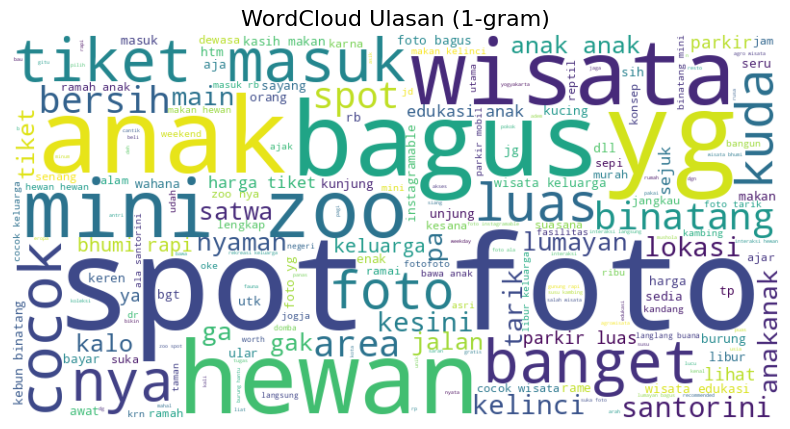

In [19]:
# Unigram
all_words = [word for tokens in df['filtered'] for word in tokens]
show_wordcloud(all_words, "WordCloud Ulasan", 1)

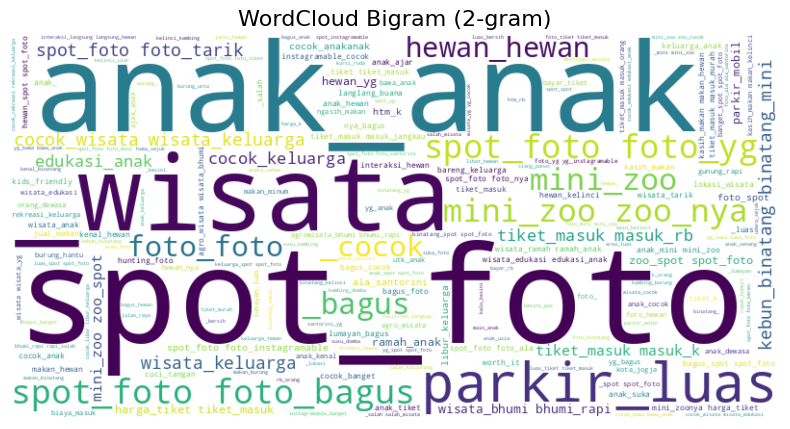

In [20]:
# Bigram
show_wordcloud(all_words, "WordCloud Bigram", 2)

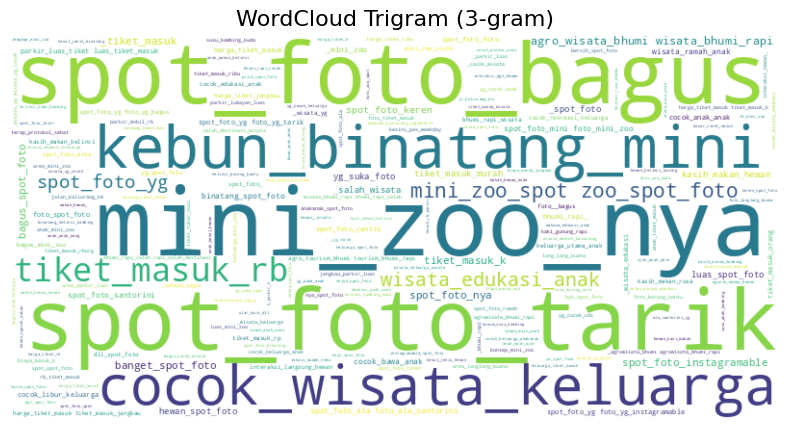

In [21]:
show_wordcloud(all_words, "WordCloud Trigram", 3)

In [22]:
df[['review', 'filtered']].to_csv("bhumi_merapijogja_preprocessed.csv", index=False, encoding="utf-8-sig")
print("\n💾 File hasil preprocessing disimpan sebagai: 'bhumi_merapi_preprocessed.csv'")


💾 File hasil preprocessing disimpan sebagai: 'bhumi_merapi_preprocessed.csv'
